<a href="https://colab.research.google.com/github/ggoddll99/24-2ESAA/blob/main/240927_%EA%B3%BC%EC%A0%9C_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **04. 텍스트 분류 실습 - 20 뉴스그룹 분류**
* 텍스트 분류 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법. - ex. 특정 신문 기사 내용이 연예/정치/사회/문화 중 어떤 카테고리에 속하는지 자동으로 분류하거나 스팸 메일 검출 같은 프로그램이 이에 속함. 지도학습 적용
  * 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측하는 것
* BOW 모델 단점
  * 희소 행렬 문제 : 희소 행렬 형태의 데이터 세트가 만들어지기 쉽다. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어진다. 문서마다 서로 다른 단어로 구성되기 때문에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많다. 하나의 문서에 있는 단어는 이 중 극히 일부분이므로 대부분의 데이터가 0 값으로 채워지게 된다. 이렇게 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬을 희소 행렬이라고 한다. 최소 행렬은 일반적으로 ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨리기 때문에 희소 행렬을 위한 특별한 기법이 마련돼있다.

텍스트를 피처 벡터화로 변환하면 일반적으로 희소 행렬 형태가 된다. 이때 분류를 효과적으로 잘 처리할 수 있는 알고리즘은 로지스틱 회귀, 선형 서포트 벡터 머신, 나이브 베이즈 등이다. -> 로지스틱 회귀 사용

1. 텍스트 정규화
2. 피처 벡터화 적용 : 카운트 기반 벡터화, TF-IDF 벡터화로 예측 성능 비교 - 피처 벡터화를 위한 파라미터
3. 적합한 머신러닝 알고리즘으로 분류를 학습/예측/평가 - GridSearchCV 기반의 하이퍼 파라미터 튜닝

-> Pipeline 객체로 피처 벡터화 파라미터와 GridSearchCV 기반의 하이퍼 파라미터 튜닝을 한꺼번에 수행한다.

**!. 텍스트 정규화**

`fetch_20newsgroups()`는 인터넷에서 로컬 컴퓨터로 데이터를 먼저 내려받은 후에 메모리로 데이터를 로딩한다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data=fetch_20newsgroups(subset='all', random_state=156)

파이썬 딕셔너리와 유사한 Bunch 객체를 반환한다. 어떤 key 값을 가지고 있는지 확인한다.

In [ ]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


`fetch_20newsgroups()` API 또한 `load_xxx()` API와 유사한 key 값을 가지고 있다. filenames는 `fetch_20newsgroups()` API가 인터넷에서 내려받아 로컬 컴퓨터에서 저장하는 디렉터리의 파일명을 지칭한다.

Target 클래스가 어떻게 구성돼 있는지 확인한다.

In [ ]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Target 클래스의 값은 0부터 19까지 20개로 구성돼 있으며, 위의 출력 결과처럼 주어졌다. - ex. Target 값 0 : alt.atheism, Target 값 1 : comp.graphics 개별 데이터가 텍스트로 어떻게 구성돼 있는지 보기 위해 데이터를 한 개만 추출해 값을 확인한다.

In [ ]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

뉴스그룹 기사의 내용, 뉴스그룹 제목, 작성자, 소속, 이메일 등 다양한 정보를 담고 있다. 이 중 내용을 제외한 다른 정보는 제거한다. 제목과 소속, 이메일 주소 등의 헤더와 푸터 정보들은 뉴스그룹 분류의 Target 클래스 값과 유사한 데이터를 가지고 있는 경우가 많기 때문이다. 이 피처들을 포함하게 되면 웬만한 ML 알고리즘을 적용해도 예측 성능이 상당히 높게 나올 것이다.

remove 파라미터를 이용하면 뉴스그룹 기사의 헤더(header), 푸터(footer) 등을 제거할 수 있다. `fetch_20newsgroups()`는 subset 파라미터를 이용해 학습 데이터 세트와 테스트 데이터 세트를 분리해 내려받을 수 있다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용 데이터만 추출. remove=('headers', footers', 'quotes')로 내용만 추출
train_news=fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train=train_news.data
y_train=train_news.target

# subset='test'로 테스트 데이터만 추출. remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news=fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=156)
X_test=test_news.data
y_test=test_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


**2. 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가**

학습 데이터와 테스트 데이터 모두 리스트 형태로 주어졌다. CountVectorizer를 이용해 학습 데이터의 텍스트를 피처 벡터화한다. 테스트 데이터를 피처 벡터화를 수행할 때는 반드시 학습 데이터를 이용해 `fit()`이 수행된 CountVectorizer 객체를 이용해 테스트 데이터를 변환(transform)해야 한다. 이렇게 변환했을 때 학습 시 설정된 CountVectorizer 피처 개수와 테스트 데이터를 CountVectorizer로 변환할 피처 개수가 같아진다. -> `fit_transform()` 사용하지 않는다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 피처 벡터화 변환
cnt_vect=CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect=cnt_vect.transform(X_train)

# 학습 데이터로 fit()된 CountVectorizer를 이용해 테스트 데이터를 피처 벡터화 변환
X_test_cnt_vect=cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVectorizer Shape :', X_train_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape : (11314, 101631)


11314개의 문서에서 피처(단어)가 101631개로 만들어졌다.

피처 벡터화된 데이터에 로지스틱 회귀를 적용해 뉴스그룹에 대한 분류를 예측한다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect, y_train)
pred=lr_clf.predict(X_test_cnt_vect)
print('CountverVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

CountverVectorized Logistic Regression의 예측 정확도는 0.617


Count 기반으로 피처 벡터화가 적용된 데이터 세트에 대한 로지스틱 회귀의 예측 정도는 약 0.616이다.

TF-IDF 기반으로 벡터화를 변경해 예측 모델을 수행한다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 반환
tfidf_vect=TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)
X_test_tfidf_vect=tfidf_vect.transform(X_test)

# LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred=lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.678


TF-IDF가 단순 카운트 기반보다 훨씬 높은 예측 정확도를 제공한다. 일반적으로 문서 내에 텍스트가 많고, 많은 문서를 가지는 텍스트 분석에서 카운트 벡터화보다는 TF-IDF 벡터화가 좋은 예측 결과를 도출한다.

텍스트 분석에서 머신러닝 모델의 성능을 향상시키는 2가지 방법 : 최적의 ML 알고리즘 선택, 최상의 피처 전처리 수행

즉, 텍스트 정규화나 Count/TF-IDF 기반 피처 벡터화를 어떻게 효과적으로 적용했는지가 텍스트 기반의 머신러닝 성능에 큰 영향을 미칠 수 있다.

다양한 파라미터 적용
1. TfidfVectorizer 클래스의 스톱 워드를 기존 'None'에서 'english'로 변경
2. ngram_range는 기존 (1, 1)에서 (1, 2)로 변경
3. `max_df=300`

In [ ]:
# stop words 필터링을 추가하고 ngram을 기본 (1, 1)에서 (1, 2)로 변경해 피처 벡터화 적용
tfidf_vect=TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)
X_test_tfidf_vect=tfidf_vect.transform(X_test)

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect, y_train)
pred=lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.690


GridSearchCV를 이용해 로지스틱 회귀의 하이퍼 파라미터 최적화를 수행해 보자. 로지스틱 회귀의 C 파라미터만 변경하면서 최적의 C 값을 찾은 뒤 이 C 값으로 학습된 모델에서 테스트 데이터로 예측해 성능을 평가한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 폴드 세트로 설정
params={'C' : [0.01, 0.1, 1, 5, 10]}
grid_cv_lr=GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가
pred=grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression의 예측 정확도는 0.704


로지스틱 회귀의 C가 10일 때 GridSearchCV의 교차 검증 테스트 세트에서 가장 좋은 예측 성능을 나타냈으며, 이를 테스트 데이터 세트에 적용하면 이전보다 약간 향상된 성능 수치인 0.704가 나타난다.

**3. 사이킷런 파이프라인 사용 및 GridSearchCV와의 결합**

사이킷런의 Pipeline 클래스를 이용하면 피처 벡터화와 ML 알고리즘 학습/예측을 위한 코드 작성을 한 번에 진행할 수 있다.

Pipeline : 데이터의 가공, 변환 등의 전처리와 알고리즘 적용을 마치 '수도관에서 물이 흐르듯' 한 번에 스트림 기반으로 처리한다는 의미이다.
1. 데이터의 전처리와 머신러닝 학습 과정을 통일된 API 기반에서 처리할 수 있어 더 직관적인 ML 모델 코드를 생성할 수 있다.
3. 대용량 데이터의 피처 벡터화 결과를 별도 데이터로 저장하지 않고 스트림 기반에서 바로 머신러닝 알고리즘의 데이터로 입력할 수 있기 때문에 수행 시간을 절약할 수 있다.

일반적으로 사이킷런 파이프라인 텍스트 기반의 피처 벡터화뿐만 아니라 모든 데이터 전처리 작업과 Estimator를 결합할 수 있다. 예를 들어 스케일링 또는 벡터 정규화, PCA 등의 변환 작업과 분류, 회귀 등의 Estimator를 한 번에 결합할 수 있다.

In [ ]:
pipeline=Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')), ('lr_clf', LogisticRegression(random_state=156))])

-> TfidfVectorizer 객체를 tfidf_vect라는 객체 변수명으로, LogisticRegression 객체를 lr_clf라는 객체 변수명으로 생성한 뒤 이 두개의 객체를 파이프라인으로 연결하는 Pipeline 객체 pipeline을 생성한다.

기존 TfidfVectorizer의 학습 데이터와 테스트 데이터에 대한 `fit()`과 `transform()` 수행을 통한 피처 벡터화와 LogisticRegressor의 `fit()`과 `predict()` 수행을 통한 머신러닝 모델의 학습과 예측이 Pipeline의 `fit()`과 `predict()`로 통일돼 수행됨을 알 수 있다.

In [ ]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect로, LogisticRegression 객체를 lr_clf로 생성하는 Pipeline 생성
pipeline=Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# 별도의 TfidfVectorizer 객체의 fit(), transform()과 LogisticRegression의 fit(), predict()가 필요 없음.
# Pipeline의 fit()과 predict()만으로 한꺼번에 피처 벡터화와 ML 학습/예측 가능.
pipeline.fit(X_train, y_train)
pred=pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Pipeline을 통한 Logistic Regression의 예측 정확도는 0.704


사이킷런은 GridSearchCV 클래스의 생성 파라미터로 Pipeline을 입력해 Pipeline 기반에서도 하이퍼 파라미터 튜닝을 GridSearchCV 방식으로 진행할 수 있게 지원한다. 이렇게 하면 피처 벡터화를 위한 파라미터와 ML 알고리즘의 하이퍼 파라미터를 모두 한 번에 GridSearchCV를 이용해 최적화할 수 있다.

GridSearchCV에 Pipeline을 입력하면서 TfidfVectorizer의 파라미터 LogisticRegression의 하이퍼 파라미터를 함께 최적화한다.

GridSearchCV에 Pipeline을 입력할 경우
* param_grid의 입력값 설정은 딕셔너리 형태의 Key와 Value 값을 가진다.
* Value를 리스트 형태로 입력한다.
* Key 값으로 'tfidf_vect__ngram_range'와 같이 하이퍼 파라미터명이 객체 변수명과 결합돼 제공된다.
  * Pipeline을 GridSearchCV에 인자로 입력하면 GridSearchCV는 Pipeline을 구성하는 피처 벡터화 객체의 파라미터와 Estimator 객체의 하이퍼 파라미터를 각각 구별할 수 있어야 하는데, 이때 개별 객체 명과 파라미터명/하이퍼 파라미터명을 결합해 Key 값으로 할당한다.
  * 가령 TfidfVectorizer 객체 변수인 tfidf_vect의 ngram_range 파라미터 값을 변화시키면서 최적화하기를 원한다면 객체 변수명인 tfidf_vect에 언더바 2개를 연달아 붙인 뒤 파라미터명인 ngram_range를 결합해 'tfidf_vect__ngram_range'를 Key 값으로 할당한다.

Pipeline + GridSearchCV를 적용할 때 유의할 점은 파라미터를 모두 최적화하려면 많은 튜닝 시간이 소모된다는 점이다. 피처 벡터화에 사용되는 파라미터와 GridSearchCV 하이퍼 파라미터를 합치면 최적화를 위한 많은 경우의 수가 발생하기 쉽다.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')),
                   ('lr_clf', LogisticRegression())
                   ])

# Pipeline에 기술된 각각의 객체 변수에 언더바 2개를 연달아 붙여 GridSearchCV에 사용될 파라미터/하이퍼 파라미터 이름과 값을 설정
params={'tfidf_vect__ngram_range' : [(1, 1), (1, 2), (1, 3)],
        'tfidf_vect__max_df' : [100, 300, 700],
        'lr_clf__C' : [1, 5, 10]
        }

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe=GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred=grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 300, 'tfidf_vect__ngram_range': (1, 2)} 0.7533152393023013
Pipeline을 통한 Logistic Regression의 예측 정확도는 0.701


TfidfVectorizer 객체의 max_df 파라미터가 700, ngram_range 파라미터가 (1, 2)로 피처 벡터화된 데이터 세트에 LogisticRegression의 C 하이퍼 파라미터에 10을 적용해 예측 분류를 수행할 때 가장 좋은 검증 세트 성능 수치가 도출됐다. 아쉽게도 이렇게 최적화된 파라미터를 기반으로 테스트 데이터 세트에 대해 예측했을 때의 정확도는 약 0.702로 크게 개선되지는 않았다.

로지스틱 회귀 외에 서포트 벡터머신와 나이브 베이즈 알고리즘도 희소 행렬 기반의 텍스트 분류에 자주 사용되는 머신러닝 알고리즘이다.

## **05. 감성분석**
감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법. 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정, 리뷰나 여론조사 의견 분석. 텍스트 분석에서 가장 활발하게 사용되고 있는 분야. 지도학습, 비지도 학습 적용
* 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 사용한다. 감성 지수는 긍정 감성 지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 감성 또는 부정 감성을 결정한다.
  * 지도학습 : 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일하다.
  * 비지도학습 : 'Lexicon'이라는 일종의 감성 어휘 사전을 이용한다. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단한다.

### **1. 지도학습 기반 감성 분석 실습 - IMDB 영화평**
지도학습 기반 감성 분석(텍스트 기반의 이진 분류) :
영화평의 텍스트를 분석해 감성 분석 결과가 긍정인지 부정인지 예측하는 모델을 만든다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

review_df=pd.read_csv('/content/drive/MyDrive/24-1/ESAA/과제/IMDB영화평/labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


* id : 각 데이터의 id
* sentiment : 영화평(review)의 Sentiment 결과 값(Target Label). 1은 긍정적 평가, 0은 부정적 평가
* review : 영화평의 텍스트

In [3]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

1. <br \> 문자열은 피처로 만들 필요가 없기 때문에 삭제한다. 판다스의 DataFrame/Series는 문자열 연산을 지원하기 위해 str 속성을 이용한다. DataFrame/Series 객체에서 str을 적용하면 다양한 문자열 연산을 수행할 수 있다. `replace()`를 str에 적용해 <br \> 태그를 공백으로 모두 바꾼다.

2. 숫자/특수문자 역시 Sentiment를 위한 피처로는 별 의미가 없으므로 모두 공란으로 변경한다. 숫자/특수문자를 찾고 이를 변환하는 것은 **정규 표현식**을 이용한다. 파이썬의 re 모듈은 편리하게 정규 표현식을 지원한다. 정규 표현식 [^a-zA-Z]는 영어 대/소문자가 아닌 모든 문자를 의미한다. `re.sub('[^a-zA-Z]', '', x)`는 영어 대/소문자가 아닌 모든 문자를 찾아 공란으로 변경하는 코드이다. 판다스 DataFrame에 `re.sub()`는 lambda 식을 이용해 적용한다.

In [4]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review']=review_df['review'].str.replace('<br />', ' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review']=review_df['review'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))

결정 값 클래스인 sentiment 칼럼을 별도로 추출해 결정 값 데이터 세트를 만들고, 원본 데이터 세트에서 id와 sentiment 칼럼을 삭제해 피처 데이터 세트를 생성한다. 그리고 `train_test_split()`을 이용해 학습용과 테스트용 데이터 세트로 분리한다.

In [5]:
from sklearn.model_selection import train_test_split

class_df=review_df['sentiment']
feature_df=review_df.drop(['id', 'sentiment'], axis=1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

학습용 데이터는 17500개 리뷰, 테스트용 데이터는 7500개의 리뷰로 구성되어 있다.

감상평 텍스트를 피처 벡터화한 후 ML 분류 알고리즘을 적용해 예측 성능을 측정한다.

Count 벡터화를 적용해 예측 성능을 측정하고, 다음으로 TF-IDF 벡터화를 적용한다. Classifier는 LogisticRegression을 이용한다. 예측 성능 평가는 이진 분류임을 고려하여 테스트 데이터 세트의 정확도와 ROC-AUC를 모두 측정한다.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, ngram은 (1, 2)로 설정해 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정
pipeline=Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10, max_iter=500))
])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행.
pipeline.fit(X_train['review'], y_train)
pred=pipeline.predict(X_test['review'])
pred_probs=pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8861, ROC-AUC는 0.9503


TF-IDF 벡터화를 이용해 다시 예측 성능을 측정한다.

In [7]:
# 스톱 워드는 english, filtering, ngram은 (1, 2)로 설정해 TF-IDF 벡터화 수행
# LogisticRegression의 C는 10으로 설정
pipeline=Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
     ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

pipeline.fit(X_train['review'], y_train)
pred=pipeline.predict(X_test['review'])
pred_probs=pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


TF-IDF 기반 피처 벡터화의 예측 성능이 조금 더 나아졌다.

### **2. 비지도학습 기반 감성 분석**
비지도 감성 분석은 Lexicon을 기반으로 한다.

Lexicon : 감성만을 분석하기 위해 지원하는 감성 어휘 사전.

감성 지수(Polarity score) : 감성 사전이 가지고 있는, 긍정(Positive) 감성, 부정(Negative) 감성 정도를 의미하는 수치. 단어의 위치, 주변 단어, 문맥, POS(Part of Speech) 등을 참고해 결정된다.

감성 사전을 구현한 대표격은 NLTK 패키지이다. NLTK는 많은 서브 모듈을 가지고 있다.
* Lexicon 모듈
* WordNet 모듈 :방대한 영어 어휘 사전. 시멘틱 정보 제공. 각각의 품사로 구성된 개별 단어를 Synset이라는 개념을 이용해 표현한다.

  * 시멘틱(semantic) : 문맥상 의미.
  
  ex. Present : 선물, 현재
  
  ex. 밥 먹었어? : 단순 식사했는지, 안부 묻기

  * Synset : 단어가 가지는 문맥, 시멘틱 정보를 제공하는 WordNet의 핵심 개념

NLP 패키지는 시멘틱을 프로그램적으로 인터페이스할 수 있는 다양한 방법을 제공한다. 하지만 예측 성능은 그리 좋지 못하다.

**대표 감성 사전**
1. SentiWordNet : NLTK 패키지의 WordNet과 유사하게 감정 단어 전용의 WordNet을 구현한 것이다. WordNet의 Synset 개념을 감성 분석에 적용한 것이다. Synset 별로 3가지 감성 점수를 할당한다.
* 긍정 감성 지수 : 해당 단어가 감성적으로 얼마나 긍정적인가를 수치로 나타낸 것
* 부정 감성 지수 : 얼마나 감성적으로 부정적인가를 수치로 나타낸 것
* 객관성 지수 : 긍정/부정 감성 지수와 완전히 반대되는 개념으로, 단어가 감성과 관계없이 얼마나 객관적인지를 수치로 나타낸 것

문장별로 단어들의 긍정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지 결정한다.
2. VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지이다. 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지이다.
3. Pattern : 예측 성능 측면에서 가장 주목받는 패키지이다. 현재 기준으로 파이썬 3.x 버전에서 호환이 되지 않는다.

SentiWordNet과 VADER 감성 사전을 이용해 감성 분석을 수행한 뒤 예측 성능을 지도학습 기반의 분류와 비교해 보자.



**SentiWordNet을 이용한 감성 분석**

NLTK 셋업 후 WordNet 서브패키지와 데이터 세트를 내려받는다.

In [8]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

WordNet 모듈을 임포트해서 'present' 단어에 대한 Synset을 추출한다. WordNet의 `synsets()`는 파라미터로 지정된 단어에 대해 WordNet에 등재된 모든 Synset 객체를 반환한다.

In [9]:
from nltk.corpus import wordnet as wn

term='present'


# present라는 단어로 wordnet의 synsets 생성
synsets=wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 계수 :', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 계수 : 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


`synsets()` 호출 시 반환되는 것은 여러 개의 Synset 객체를 가지는 리스트이다. 총 18개의 서로 다른 semantic을 가지는 synset 객체가 반환됐다. `Synset('present.n.01')`와 같이 Synset 객체의 파라미터 'present.n.01'은 POS 태그를 나타낸다. 'present.n.01'에서 present의 의미, n은 명사 품사, 01은 present가 명사로서 가지는 의미가 여러 가지 있어서 이를 구분하는 인덱스이다.

synset 객체가 가지는 여러 가지 속성을 살펴 보자. Synset은 POS(품사), 정의, 부명제(Lemma) 등으로 시멘틱적인 요소를 표현할 수 있다.

In [10]:
for synset in synsets:
  print('#### Synset name :', synset.name(), '####')
  print('POS :', synset.lexname())
  print('Definition :', synset.definition())
  print('Lemmas :', synset.lemma_names())

#### Synset name : present.n.01 ####
POS : noun.time
Definition : the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas : ['present', 'nowadays']
#### Synset name : present.n.02 ####
POS : noun.possession
Definition : something presented as a gift
Lemmas : ['present']
#### Synset name : present.n.03 ####
POS : noun.communication
Definition : a verb tense that expresses actions or states at the time of speaking
Lemmas : ['present', 'present_tense']
#### Synset name : show.v.01 ####
POS : verb.perception
Definition : give an exhibition of to an interested audience
Lemmas : ['show', 'demo', 'exhibit', 'present', 'demonstrate']
#### Synset name : present.v.02 ####
POS : verb.communication
Definition : bring forward and present to the mind
Lemmas : ['present', 'represent', 'lay_out']
#### Synset name : stage.v.01 ####
POS : verb.creation
Definition : perform (a play), especially on a stage
Lemmas : ['stage', 'present', 'represent']
##

`Synset('present.n.01')`과 Synset('present.n.02')`는 명사지만 서로 다른 의미를 가지고 있다. `Synset('present.n.01')`은 POS가 noun.time이며 Definition을 살펴보면 '시간적인 의미로 현재'를 나타낸다. `Synset('present.n.02')`는 POS가 noun.possession이며 Definition은 '선물'이다. `Synset('show.v.01')`은 동사로서 POS가 verb.perception이며, Definition은 '관객에게 전시물 등을 보여주다'라는 뜻이다. 이처럼 synset은 하나의 단어가 가질 수 있는 여러 가지 시멘틱 정보를 개별 클래스로 나타낸 것이다.

WordNet은 어떤 어휘와 다른 어휘 간의 관계를 유사도로 나타낼 수 있다. synset 객체는 단어 간의 유사도를 나타내기 위해 `path_similarity()` 메서드를 제공한다. 이를 이용하여 tree, lion, tiger, cat, dog라는 단어의 상호 유사도를 살펴보자.

In [11]:
# synet 객체를 단어별로 생성한다.
tree=wn.synset('tree.n.01')
lion=wn.synset('lion.n.01')
tiger=wn.synset('tiger.n.02')
cat=wn.synset('cat.n.01')
dog=wn.synset('dog.n.01')

entities=[tree, lion, tiger, cat, dog]
similarities=[]
entity_names=[entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도를 측정한다.
for entity in entities:
  similarity=[round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
  similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장한다.
similarity_df=pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


lion은 tree와의 유사도가 0.07로 가장 작고, tiger와의 유사도가 0.33으로 가장 큼.

SentiWordNet은 WordNet의 Synset과 유사한 Senti_Synset 클래스를 가지고 있다. SentiWordNet 모듈의 `senti_synsets()`는 WordNet 모듈이라서 `synsets()`와 비슷하게 Senti_Synset 클래스를 리스트 형태로 반환한다.

In [12]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets=list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 개수 :', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 개수 : 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이 되고, 감성 지수는 모두 0이 된다.

father(아버지)라는 단어와 fabulous(아주 멋진)라는 두 개 단어의 감성 지수와 객관성 지수를 나타낸다.

In [13]:
import nltk
from nltk.corpus import sentiwordnet as swn

father=swn.senti_synset('father.n.01')
print('father 긍정감성 지수 :', father.pos_score())
print('father 부정감성 지수 :', father.neg_score())
print('father 객관성 지수 :', father.obj_score())
print('\n')
fabulous=swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수 :', fabulous.pos_score())
print('fabulous 부정감성 지수 :', fabulous.neg_score())

father 긍정감성 지수 : 0.0
father 부정감성 지수 : 0.0
father 객관성 지수 : 1.0


fabulous 긍정감성 지수 : 0.875
fabulous 부정감성 지수 : 0.125


father은 객관적인 단어로 객관성 지수가 1.0이고 긍정 감성/부정 감성 지수 모두 0이다. 반면 fabulous는 감성 단어로서 긍정 감성 지수가 0.875, 부정 감성 지수가 0.125이다.

**1) SentiWordNet을 이용한 영화 감상평 감성 분석**

1. 문서를 문장 단위로 분해 : **WordNet**
2. 문장을 단어 단위로 토큰화하고 품사 태깅 : **어근 추출(Lemmatization), 품사 태깅(POS Tagging)**
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체 생성
4. senti_synset 객체에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정 : **Polarity Score 합산 함수 생성**(각 단어의 긍정 지수와 부정 지수를 모두 합한 총 감성 지수가 0 이상일 경우 긍정 감성, 그렇지 않을 경우 부정 감성으로 예측한다.)

**품사 태깅 내부 함수 생성**

In [14]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
  # 감성 지수 초기화
  sentiment=0.0
  tokens_count=0

  lemmatizer=WordNetLemmatizer()
  raw_sentences=sent_tokenize(text)
  # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
  for raw_sentence in raw_sentences:
    # NLTK 기반의 품사 태깅 문장 추출
    tagged_sentence=pos_tag(word_tokenize(raw_sentence))
    for word, tag in tagged_sentence:
      # WordNet 기반 품사 태깅과 어근 추출
      wn_tag=penn_to_wn(tag)
      if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        continue
      lemma=lemmatizer.lemmatize(word, pos=wn_tag)
      if not lemma:
        continue
      # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성
      synsets=wn.synsets(lemma, pos=wn_tag)
      if not synsets:
        continue
        # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
        # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
      synset=synsets[0]
      swn_synset=swn.senti_synset(synset.name())
      sentiment+=(swn_synset.pos_score()-swn_synset.neg_score())
      tokens_count+=1
  if not tokens_count:
    return 0
  # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
  if sentiment >=0:
    return 1
  return 0

`swn_polarity(text)` 함수를 IMDB 감상평의 개별 문서에 적용해 긍정 및 부정 감성을 예측한다. 판다스의 apply lambda 구문을 이용해 `swn_polarity(text)`를 개별 감상평 텍스트에 적용한다. 지도학습 기반의 감성 분석에서 생성한 review_df DataFrame을 그대로 이용한다. review_df의 새로운 칼럼으로 'preds'를 추가해 이 칼럼에 `swn_polarity(text)`로 반환된 결과의 정확도, 정밀도, 재현율 값을 모두 측정한다.

In [16]:
review_df['preds']=review_df['review'].apply(lambda x : swn_polarity(x))
y_target=review_df['sentiment'].values
preds=review_df['preds'].values

SentiWordNet의 감성 분석 예측 성능을 살펴보자.

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도 :', np.round(accuracy_score(y_target, preds), 4))
print('정밀도 :', np.round(precision_score(y_target, preds), 4))
print('재현율 :', np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도 : 0.6613
정밀도 : 0.6472
재현율 : 0.7091


전반적인 성능 지표가 만족스럽지는 않다.

**2) VADER를 이용한 감성 분석**

VADER은 SentimentIntensityAnalyzer 클래스를 이용해 쉽게 감성 분석을 제공한다. VADER는 NLTK 패키지의 서브 모듈로 제공될 수도 있고 단독 패키지로 제공될 수도 있다. VADER를 NLTK 서브 모듈로 설치하는 부분은 바로 이전의 'SentiWordNet을 이용한 감성 부석' 첫 번째 소스코드인 `import nltk`와 `nltk.download('all')`을 통해 완료했다.

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer=SentimentIntensityAnalyzer()
senti_scores=senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


SentimentIntensityAnalyzer 객체의 `polarity_scores()` 메서드는 딕셔너리 형태의 감성 점수를 반환한다. 'neg'는 부정 감성 지수, 'neu'는 중립적인 감성 지수, 'pos'는 긍정 감성 지수, compound는 neg, neu, pos score를 적절히 조합해 -1에서 1 사이의 감성 지수를 표현한 값이다. compound score를 기반으로 부정 감성 또는 긍정 감성 여부를 결정한다. 보통 0.1 이상이면 긍정, 그 이하면 부정 감성으로 판단하나 상황에 따라 이 임곗값을 적절히 조정해 예측 성능을 조절한다.

`vader_polarity()` 함수를 만든다. 입력 파라미터로 영화 감상평 텍스트와 긍정/부정을 결정하는 임곗값(threshold)을 가지고, SentimentIntensityAnalyzer 객체의 `polarity_scores()` 메서드를 호출해 감성 결과를 반환한다. review_df DataFrame의 apply lambda 식을 통해 `vader_polarity()` 함수를 호출해 각 문서별로 감성 결과를 vader_preds라는 review_df의 새로운 칼럼으로 저장한 뒤, 저장된 감성 분석 결과를 기반으로 VADER의 예측 성능을 측정한다.

In [19]:
def vader_polarity(review, threshold=0.1):
  analyzer=SentimentIntensityAnalyzer()
  scores=analyzer.polarity_scores(review)

  # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
  agg_score=scores['compound']
  final_sentiment=1 if agg_score >= threshold else 0
  return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds']=review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target=review_df['sentiment'].values
vader_preds=review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도 :', np.round(accuracy_score(y_target, vader_preds), 4))
print('정밀도 :', np.round(precision_score(y_target, vader_preds), 4))
print('재현율 :', np.round(recall_score(y_target, vader_preds), 4))

[[ 6747  5753]
 [ 1858 10642]]
정확도 : 0.6956
정밀도 : 0.6491
재현율 : 0.8514


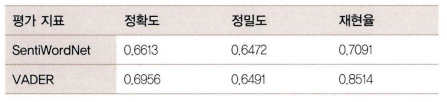